In [47]:
import numpy as np, json
from phc import module_reload
module_reload('zhh')
import matplotlib.pyplot as plt
from zhh import get_runtime_analysis, evaluate_runtime, get_adjusted_time_per_event, get_sample_chunk_splits, get_process_normalization
from typing import Optional
from math import floor, ceil

version = 'v1'
REPO_ROOT = '/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/ZHH'
ILD_VERSION = 'ILD_l5_o1_v02'
PROD_NAME = '500-TDR_ws'

with open(f'{REPO_ROOT}/workflows/analysis/custom_statistics.json') as f:
    custom_statistics = json.load(f)

DATA_ROOT = f'/nfs/dust/ilc/user/bliewert/zhh'
PROCESS_INDEX = f'{DATA_ROOT}/CreateRawIndex/v1/processes.npy'
SAMPLE_INDEX = f'{DATA_ROOT}/CreateRawIndex/v1/samples.npy'

processes = np.load(PROCESS_INDEX)
samples = np.load(SAMPLE_INDEX)

DATA_ROOT_OLD = f'/nfs/dust/ilc/user/bliewert/zhh_old'
PROCESS_INDEX_OLD = f'{DATA_ROOT_OLD}/CreateRawIndex/v1/processes.npy'
SAMPLE_INDEX_OLD = f'{DATA_ROOT_OLD}/CreateRawIndex/v1/samples.npy'

processes_OLD = np.load(PROCESS_INDEX)
samples_OLD = np.load(SAMPLE_INDEX)

Runtime analysis

In [49]:
pn = get_process_normalization(processes, samples, RATIO_BY_EXPECT=1.)
ra = get_runtime_analysis(DATA_ROOT = f'/nfs/dust/ilc/user/bliewert/zhh/PreselectionRuntime/{version}')
atpe = get_adjusted_time_per_event(ra)
scs = get_sample_chunk_splits(samples, atpe, pn, custom_statistics=custom_statistics, MAXIMUM_TIME_PER_JOB=7200)

In [50]:
len(scs)

4458

In [45]:
sorted_atpe = atpe[np.argsort(atpe['tPE'])][:12]
sorted_atpe

array([('2f_z_nung',  7.3333335, 3000, 0.01466667),
       ('vvveev', 15.5      , 1997, 0.03104657),
       ('2f_z_bhabhang', 16.666666 , 5976, 0.0334672 ),
       ('4f_sznu_l', 17.25     , 2000, 0.0345    ),
       ('4f_szeorsw_l', 17.9      , 4987, 0.03589332),
       ('4f_sze_l', 18.5      , 5979, 0.03712995),
       ('4f_lowmee_sze_l', 13.75     , 1390, 0.03956835),
       ('vvvelv', 22.333334 , 1500, 0.04466667),
       ('4f_lowmee_szeorsw_l', 18.5      , 1615, 0.04582043),
       ('eeeeee', 25.5      , 1992, 0.05120482),
       ('4f_sw_l', 25.8      , 4996, 0.05164131),
       ('eeeell', 26.25     , 1992, 0.05271084)],
      dtype=[('process', '<U64'), ('tAvg', '<f4'), ('n_processed', '<i4'), ('tPE', '<f4')])

Text(0, 0.5, 'time per event [s]')

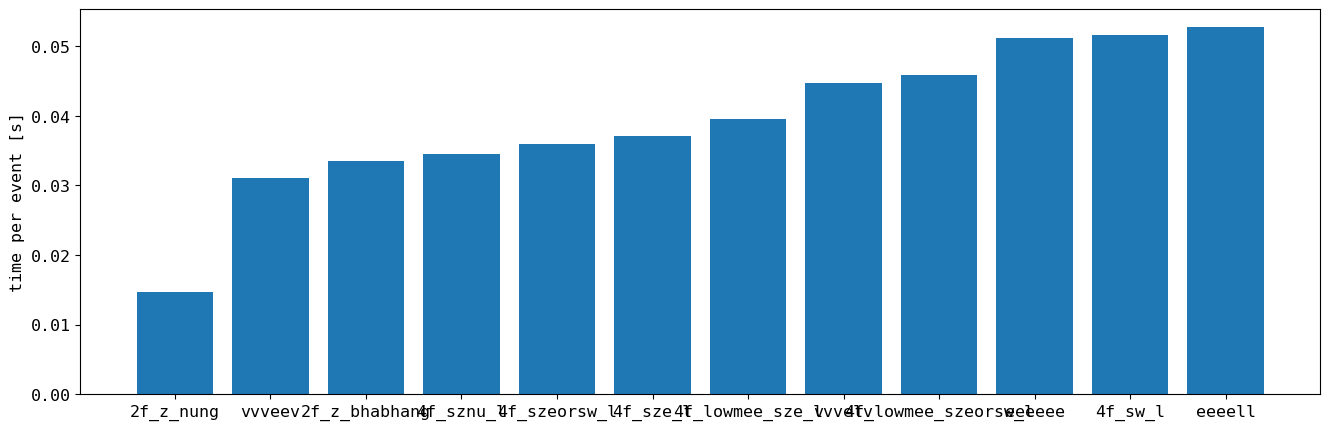

In [48]:
fig, ax = plt.subplots(figsize=(16, 5)) 
ax.bar(sorted_atpe['process'], sorted_atpe['tPE'])
ax.set_ylabel('time per event [s]')

In [14]:
n_before = 0
n_after = 0

for process in np.unique(samples['process']):
    entry = adjusted_time_per_event[adjusted_time_per_event["process"] == process]
    
    n_samples = np.sum(samples["process"] == process)
    n_samples_adj = n_samples*entry['tPE']
    print(f'{process} -> {n_samples} -> {n_samples_adj}')
    
    n_before += n_samples
    n_after += ceil(n_samples_adj)
    
print(f'Before {n_before} | After {n_after}')

2f_z_bhabhag -> 40 -> [40.]
2f_z_bhabhang -> 646 -> [646.]
2f_z_h -> 230 -> [1150.]
2f_z_l -> 24 -> [24.]
2f_z_nung -> 477 -> [477.]
4f_lowmee_sze_l -> 4 -> [4.]
4f_lowmee_szeorsw_l -> 4 -> [4.]
4f_sw_l -> 56 -> [56.]
4f_sw_sl -> 38 -> [190.]
4f_sze_l -> 269 -> [269.]
4f_sze_sl -> 36 -> [180.]
4f_szeorsw_l -> 36 -> [36.]
4f_sznu_l -> 5 -> [5.]
4f_sznu_sl -> 11 -> [55.]
4f_ww_h -> 55 -> [247.5]
4f_ww_l -> 7 -> [21.]
4f_ww_sl -> 43 -> [172.]
4f_zz_h -> 11 -> [55.]
4f_zz_l -> 2 -> [2.]
4f_zz_sl -> 41 -> [205.]
4f_zzorww_h -> 48 -> [240.]
4f_zzorww_l -> 15 -> [15.]
e1e1hh -> 121 -> [605.]
e1e1qqh -> 80 -> [400.]
e2e2hh -> 60 -> [300.]
e2e2qqh -> 42 -> [210.]
e3e3hh -> 59 -> [295.]
e3e3qqh -> 42 -> [210.]
eeeeee -> 4 -> [4.]
eeeell -> 4 -> [4.]
eeeexx -> 4 -> [17.]
eeeeyy -> 4 -> [20.]
eellxx -> 4 -> [20.]
eellyy -> 4 -> [20.]
eeveev -> 4 -> [4.]
eevelv -> 4 -> [12.]
eeveyx -> 10 -> [50.]
eevlev -> 4 -> [4.]
eevllv -> 5 -> [5.]
eevlyx -> 14 -> [49.]
eexyev -> 10 -> [30.]
eexylv -> 13 -> [48